# Final Project
----
Choose a dataset you are interested in exploring. Then create graphs to learn more about the data. When making graphs, consider the variable types and choose graphs that effectively describe those variables (for example, a scatterplot doesn’t usually show categorical data very well).
----
The dataset of choice is a dataset surrounding nintendo games. I feel this one may have some fun questions that come from the data. And there are some null values to clean. Along with the date that was released so that I can wrangle it to a point where it is usuable. This dataset can be found right here. https://www.kaggle.com/datasets/joebeachcapital/nintendo-games. 

In [163]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re
import matplotlib.dates as mdates

# Obtain Data

In [164]:
# read the csv and check the data.
games = pd.read_csv("NintendoGames.csv")
games.head()
#Seeing this I notice that the developers and genres will also need some wrangling later on. 

,meta_score,title,platform,date,user_score,link,esrb_rating,developers,genres
0,NaN,Super Mario RPG,Switch,"Nov 17, 2023",NaN,/game/switch/super-mario-rpg,E,['Nintendo'],"['Role-Playing', 'Japanese-Style']"
1,NaN,WarioWare: Move It!,Switch,"Nov 3, 2023",NaN,/game/switch/warioware-move-it!,RP,['Intelligent Systems'],"['Miscellaneous', 'Party / Minigame']"
2,NaN,Super Mario Bros. Wonder,Switch,"Oct 20, 2023",NaN,/game/switch/super-mario-bros-wonder,E,['Nintendo'],"['Action', 'Platformer', '2D']"
3,NaN,Detective Pikachu Returns,Switch,"Oct 6, 2023",NaN,/game/switch/detective-pikachu-returns,NaN,['Creatures Inc.'],"['Adventure', '3D', 'Third-Person']"
4,NaN,Fae Farm,Switch,"Sep 8, 2023",NaN,/game/switch/fae-farm,E10+,['Phoenix Labs'],"['Simulation', 'Virtual', 'Virtual Life']"


# Cleaning Data

In [165]:
games.isna().sum()
# I am going to want all the scores and ratings involved so I want to fill these values rather than drop them. 
# Also because I only have just over 1,000 rows. Every row counts.


meta_score     385
title            0
platform         0
date             0
user_score     238
link             0
esrb_rating    122
developers       3
genres           0
dtype: int64

In [166]:
# I want to make sure my filling of the null values changes the standard deviation the least amount. So lets check the values orrigianlly
# columns = ["meta_score", "user_score", "esrb_rating"]
# for i in columns:
#     print(games[i].std())
# Running this I found that the esrb_rating was a categorical variable. So having a null value should be alright. But we may fill it with the average one.
columns = ["meta_score", "user_score"]
for i in columns:
    print(games[i].std())

10.610735041391814
1.031265715943983


In [167]:
# Lets look through the ways we can fill the nulls for meta_score the best. 
print(f'Original Value = {games['meta_score'].std()} ')
print(f'Forward Fill = {games["meta_score"].ffill().std()}')
print(f'Back Fill = {games["meta_score"].bfill().std()}')
print(f'Average = {games["meta_score"].fillna(games["meta_score"].mean()).std()}')
# This shows me that average is probably the worst choice I can choose.
# However the back fill is the closest value to the original. So this is the method I choose for this one.


Original Value = 10.61 
Forward Fill = 10.189564322108192
Back Fill = 10.733591897595069
Average = 8.53988491022847


In [168]:
games["meta_score"].bfill(inplace=True)
games['meta_score'].dropna(inplace=True)
games = games[~games['meta_score'].isna()]
games['meta_score'].isna().sum()

0

In [169]:
# Lets do the same for user score
print(f'Original Value = 1.03 ')
print(f'Forward Fill = {games["user_score"].ffill().std()}')
print(f'Back Fill = {games["user_score"].bfill().std()}')
print(f'Average = {games["user_score"].fillna(games["user_score"].mean()).std()}')
# This shows me the same thing as the last situation

Original Value = 1.03 
Forward Fill = 1.011323426976997
Back Fill = 1.0233136083981083
Average = 0.9171508869986092


In [170]:
games["user_score"].bfill(inplace=True)
games['user_score'].dropna(inplace=True)
games = games[~games['user_score'].isna()]
games['user_score'].isna().sum()

0

In [171]:
games['developers'] = games['developers'].fillna("[]")

In [172]:
# Unreleased games have the date of TBA so we need to change that. There are also TBA and then a year. Showing that we know that it is coming out on a certain year but thats it. 

pattern = re.compile(r'(TBA|Q\d+)(?:\s\d{4})?')
games = games[~games['date'].str.match(pattern)]

In [173]:
# There are also canceled dates for all the games that got canceled by nintendo.
canceled = games[games['date'].str.contains('Canceled')]
games = games[~games['date'].str.contains('Canceled')]

# Data Wrangling

In [174]:
# Lets get that esrb rating all cleaned up
games['esrb_rating'].unique()
# Lets make a map and tie these values to a number. I always tie E games to a smaller scale. And M as the highest so this should be okay.
# When looking at the unique values I realized that RP is a valid rating even though it basically means null. So I will be giving it the value I will be assigning to null.
esrb_map = {
    "E": 1,
    "E10+": 2,
    "T": 3,
    "M": 4,
    "RP": 0,
    np.NaN: 0
}

games['esrb_rating'] = games['esrb_rating'].map(esrb_map)


In [175]:
# Now it is time to get rid of those pesky lists 
import ast

def convert_string_to_list(s):
    return ast.literal_eval(s)

columnsToConvert = ["genres", "developers"]
for i in columnsToConvert:
    games[i] = games[i].apply(convert_string_to_list)


#After running and thinking through it, it is decent enough. This will work



In [176]:
# We need to turn the datetime column to a datetime
games['date'] = pd.to_datetime(games['date'], format='%b %d, %Y')

In [177]:
games.head()
for i in games['genres'][1]:
    print(i)

# Test to make sure that the data was wrangled to what I would like

Miscellaneous
Party / Minigame


# Graphs

Text(0.5, 0, 'Meta Score')

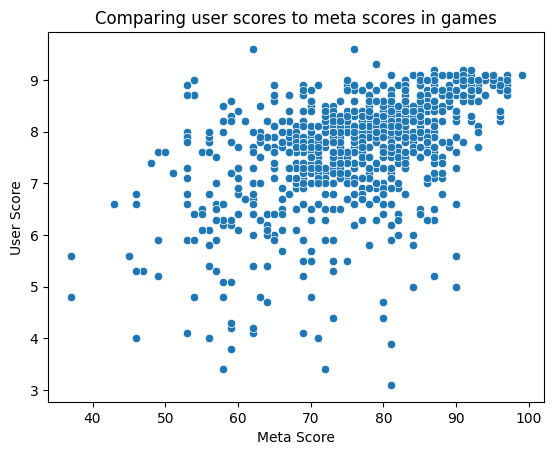

In [210]:
# Lets start by graphing user scores compared to metacritic scores
fig, ax = plt.subplots()
sns.scatterplot(data=games, x='meta_score', y='user_score', ax=ax)

ax.set_title("Comparing user scores to meta scores in games")
ax.set_ylabel("User Score")
ax.set_xlabel("Metacritic Score")


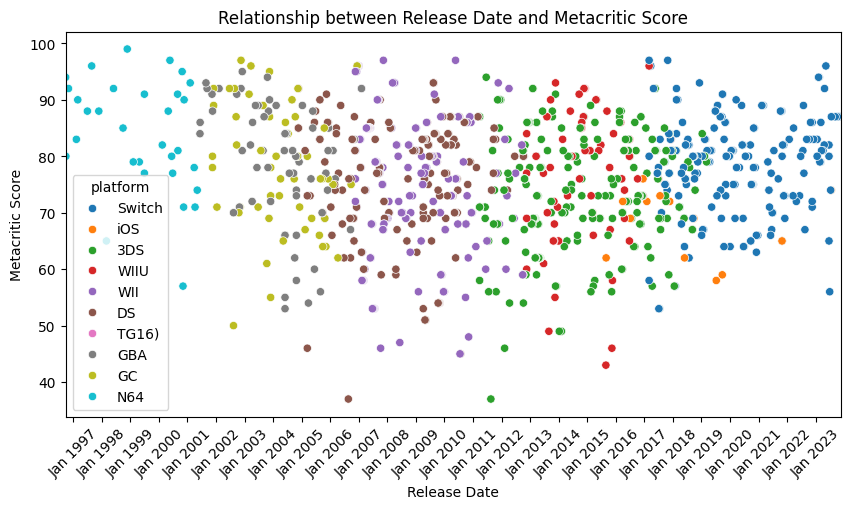

In [215]:
# That graph has surprissingly little correlation
# Lets try graphing to see if the date the game was released has an effect on the user_score. 

# Create subplots
fig, ax = plt.subplots(figsize=(10, 5))

# Set date formatting
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Plot the data using seaborn
sns.scatterplot(data=games, x='date', y='meta_score', ax=ax, hue='platform')

# Set labels and title
ax.set_xlabel('Release Date')
ax.set_ylabel('Metacritic Score')
ax.set_title('Relationship between Release Date and Metacritic Score')

# Set x-axis limits to cover the entire date range
ax.set_xlim(games['date'].min(), games['date'].max())

# Set the frequency of x-axis ticks for better readability
ax.xaxis.set_major_locator(mdates.YearLocator())

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()

In [220]:
for i in games['platform'].unique():
    print(f"{i}: {games[games['platform'] == i]['meta_score'].mean()}")

Switch: 78.49009900990099
iOS: 68.85714285714286
3DS: 74.21653543307086
WIIU: 76.34246575342466
WII: 74.92817679558011
DS: 74.94791666666667
TG16): 85.0
GBA: 79.0
GC: 78.01923076923077
N64: 83.96774193548387


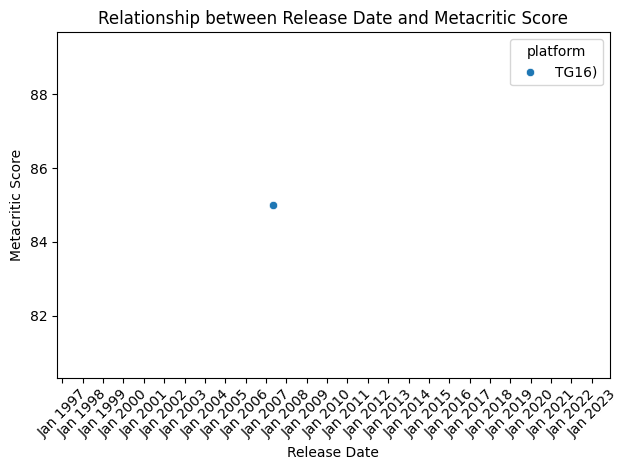

In [180]:
# Seeing the graph above I am confused on what the heck a TG16) is. So I am going to graph just those

# Create subplots
fig, ax = plt.subplots()

# Set date formatting
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Plot the data using seaborn
sns.scatterplot(data=games[games['platform'] == 'TG16)'], x='date', y='meta_score', ax=ax, hue='platform')

# Set labels and title
ax.set_xlabel('Release Date')
ax.set_ylabel('Metacritic Score')
ax.set_title('Relationship between Release Date and Metacritic Score')

# Set x-axis limits to cover the entire date range
ax.set_xlim(games['date'].min(), games['date'].max())

# Set the frequency of x-axis ticks for better readability
ax.xaxis.set_major_locator(mdates.YearLocator())

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

In [181]:
# Only 1... Curious. Now I just want to know what it is talking about
games[games['platform'] == 'TG16)']
# Weird! I never have heard of the game before or the platform. It seems that the platform in question is the TurboGrafx-16. 

,meta_score,title,platform,date,user_score,link,esrb_rating,developers,genres
831,85.0,Ordyne,TG16),2007-05-07,8.2,/game/wii/ordyne-tg16,1,[Namco],"[Action, Shooter, Scrolling]"


In [182]:
# There is a bit of data that i had to drop to be able to view these in graph form. But I want to view them now. 
# The cancelled ones.

canceled

,meta_score,title,platform,date,user_score,link,esrb_rating,developers,genres
1072,68.0,Project H.A.M.M.E.R.,WII,Canceled,7.8,/game/wii/project-hammer,NaN,['Nintendo'],"['Action', ""Beat-'Em-Up"", ""Beat-'Em-Up"", '2D']"
1073,68.0,Jet Impulse,DS,Canceled,7.8,/game/ds/jet-impulse,NaN,['Nintendo'],"['Simulation', 'Flight', 'Modern Jet', 'Combat']"
1074,68.0,Line Attack Heroes,WII,Canceled,7.8,/game/wii/line-attack-heroes,NaN,['GREZZO'],"['Action', 'General', 'General']"
1075,68.0,Wii U Play,WIIU,Canceled,7.8,/game/wii-u/wii-u-play,RP,['Nintendo'],"['Miscellaneous', 'Party', 'Party / Minigame']"
1076,68.0,Measure Up,WIIU,Canceled,7.8,/game/wii-u/measure-up,NaN,['Nintendo'],"['Miscellaneous', 'General', 'General']"
1077,68.0,Make 10,DS,Canceled,7.8,/game/ds/make-10,NaN,['MuuMuu'],"['Miscellaneous', 'Puzzle', 'Puzzle', 'Logic',..."
1078,68.0,ASH: Archaic Sealed Heat,DS,Canceled,7.8,/game/ds/ash-archaic-sealed-heat,E10+,['Mistwalker'],"['Role-Playing', 'Strategy', 'Turn-Based', 'Ge..."
1079,68.0,Nintendo Letterbox,DS,Canceled,7.8,/game/ds/nintendo-letterbox,NaN,['Nintendo'],"['Miscellaneous', 'General', 'General', 'Appli..."
1081,68.0,Wii Karaoke U,WIIU,Canceled,7.8,/game/wii-u/wii-karaoke-u,NaN,['TOSE'],"['Action', 'Miscellaneous', 'Rhythm', 'Music',..."


In [183]:
# This is as much as I will be showing off these canceled games. 
# That is because all of the data that is fun to view on this dataset is null

/var/folders/4m/rfps23yn1rxdc27kmnt42lz80000gn/T/ipykernel_50149/3095632960.py:11: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



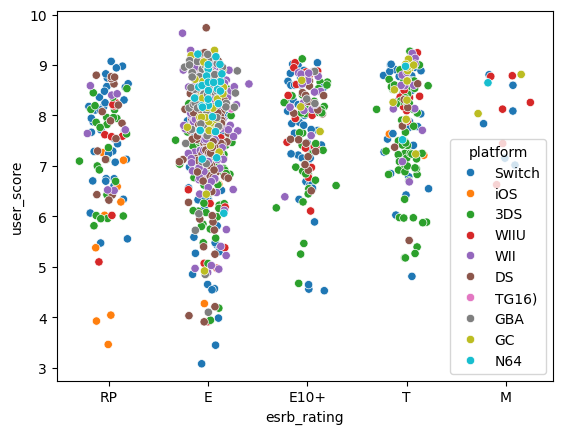

In [223]:
# I am curious to see if there is any visable correlation between user scores and the esrb rating.

fig, ax = plt.subplots()

def jitter(values,j):
    return values + np.random.normal(j,0.1,values.shape)


sns.scatterplot(x=jitter(games['esrb_rating'], 0), y=jitter(games['user_score'], 0), ax=ax, hue=games['platform'])

ax.set_xticklabels(['None', 'RP', 'E', 'E10+', 'T', 'M'])

import plotly.express as px
px.scatter(x=jitter(games['esrb_rating'], 0), y=jitter(games['user_score'], 0), color=games['platform'])

In [185]:
games[games['user_score'] == games['user_score'].max()]
# One of these is correct, the other one was null and just ended up there. Metal torrent seems to actually have the fabled 9.6 score. However it seems to have been review bombed and is not deserving of this title. 

,meta_score,title,platform,date,user_score,link,esrb_rating,developers,genres
611,76.0,Art Style: light trax,WII,2010-05-24,9.6,/game/wii/art-style-light-trax,1,[Skip Ltd.],"[Miscellaneous, General, General]"
612,62.0,Metal Torrent,DS,2010-05-24,9.6,/game/ds/metal-torrent,1,[Arika],"[Action, Shooter, Shooter, Scrolling, Scrollin..."


In [186]:
# I didn't know nintendo had that many M rated games, so I want to see them all
games[games['esrb_rating'] == 4]

,meta_score,title,platform,date,user_score,link,esrb_rating,developers,genres
30,86.0,Bayonetta 3,Switch,2022-10-28,7.1,/game/switch/bayonetta-3,4,[PlatinumGames],"[Action Adventure, Linear]"
147,67.0,Travis Strikes Again: No More Heroes,Switch,2019-01-18,7.8,/game/switch/travis-strikes-again-no-more-heroes,4,[Grasshopper Manufacture],"[Action, Beat-'Em-Up, 3D]"
191,90.0,Bayonetta + Bayonetta 2,Switch,2018-02-16,8.7,/game/switch/bayonetta-+-bayonetta-2,4,[PlatinumGames],"[Miscellaneous, Compilation]"
192,92.0,Bayonetta 2,Switch,2018-02-16,8.6,/game/switch/bayonetta-2,4,"[Nintendo, PlatinumGames]","[Action Adventure, Linear]"
193,84.0,Bayonetta,Switch,2018-02-16,8.3,/game/switch/bayonetta,4,"[Nintendo, PlatinumGames]","[Action Adventure, Linear]"
228,70.0,Sine Mora EX,Switch,2017-08-08,7.2,/game/switch/sine-mora-ex,4,[Grasshopper Manufacture],"[Action, Shooter, Shoot-'Em-Up, Horizontal]"
335,67.0,Fatal Frame: Maiden of Black Water,WIIU,2015-10-22,8.0,/game/wii-u/fatal-frame-maiden-of-black-water,4,[Koei Tecmo Games],"[Action, General, Horror, Action Adventure, Su..."
341,43.0,Devil's Third,WIIU,2015-08-28,6.6,/game/wii-u/devils-third,4,[Valhalla Game Studios],"[Action Adventure, General, Modern, Action, Sh..."
378,86.0,Bayonetta,WIIU,2014-10-24,8.8,/game/wii-u/bayonetta,4,[Bee Tribe],"[Action, Fantasy, Beat-'Em-Up, Action Adventur..."
380,85.0,Bayonetta + Bayonetta 2,WIIU,2014-10-24,8.2,/game/wii-u/bayonetta-+-bayonetta-2,4,[PlatinumGames],"[Miscellaneous, Compilation]"


In [203]:
# After looking through the data it is time to check the actual correlations and see whats up
games[['meta_score', 'user_score', 'esrb_rating', 'date']].corr()

,meta_score,user_score,esrb_rating,date
meta_score,1.000000,0.480876,0.085373,-0.031158
user_score,0.480876,1.000000,0.112850,-0.240484
esrb_rating,0.085373,0.112850,1.000000,0.136402
date,-0.031158,-0.240484,0.136402,1.000000


In [188]:
# Those rows seem to be the only ones that can be tested for a correlation. 
# The correlations aren't strong but it is good enough

In [189]:
# Lets make a linear regression to predict the meta_score based on the user_score
def CalcB1(x, y):
    xbar = x - x.mean()
    ybar = y - y.mean()
    return xbar.dot(ybar)/xbar.dot(xbar)
    

def CalcB0(x, y):
    return y.mean() - CalcB1(x, y) * x.mean()

def linearRegressionValues(x, y):
    return CalcB0(x, y), CalcB1(x, y)

print(games['meta_score'].isna().sum())

b0, b1 = linearRegressionValues(games['user_score'], games['meta_score'])
print(f'{b0:0.3f} + {b1:0.3f}x')



0
37.590 + 5.020x


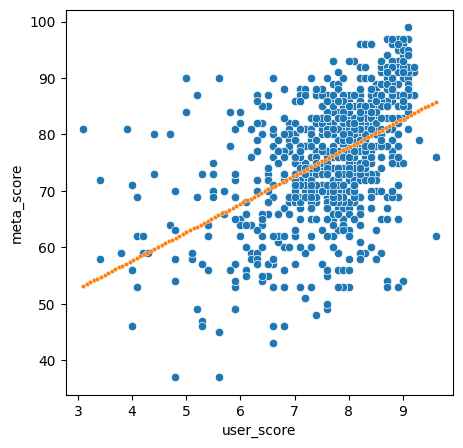

In [200]:
def plotRegression(x, y, ax):
    b0, b1 = linearRegressionValues(x, y)
    xplot = np.linspace(x.min(), x.max(), 100)
    yplot = b0 + b1*xplot
    sns.scatterplot(x=x, y=y, ax=ax)
    sns.scatterplot(x=xplot, y=yplot, ax=ax, s=10)

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

plotRegression(games['user_score'], games['meta_score'], ax)

In [190]:
games['predicted_meta_score'] = b0 + b1 * games['user_score']
games['predicted_meta_score']

0       82.768780
1       82.768780
2       82.768780
3       82.768780
4       82.768780
          ...    
1067    79.756859
1068    80.760833
1069    79.254872
1070    77.246925
1071    83.270767
Name: predicted_meta_score, Length: 1064, dtype: float64

In [195]:
def mae_metric(x, y):
    sum = 0

    for i in range(len(x)):
        sum += abs(x.values[i] - y.values[i])

    return sum/(len(x))

print(mae_metric(games['meta_score'], games['predicted_meta_score']))

7.321098131895652


In [196]:
def sse_metric(x, y):
    sum = 0

    for i in range(len(x)):
        sum += pow((x.values[i] - y.values[i]), 2)

    return sum


print(sse_metric(games['meta_score'], games['predicted_meta_score']))

94495.49460211628


In [197]:
def mse_metric(x, y):
    sum = 0

    for i in range(len(x)):
        sum += pow((x.values[i] - y.values[i]), 2)

    return sum/len(x)


print(mse_metric(games['meta_score'], games['predicted_meta_score']))

88.81155507717695


In [198]:
def rmse_metric(x, y):
    sum = 0

    for i in range(len(x)):
        sum += pow((x.values[i] - y.values[i]), 2)

    return np.sqrt(sum/len(x))


print(rmse_metric(games['meta_score'], games['predicted_meta_score']))

9.42398827870541


In [199]:
def rmsle_metric(x, y):
    sum = 0

    for i in range(len(x)):
        sum += ((np.log((1 + x.values[i])) - np.log( 1 + y.values[i])))

    sum = sum / len(x)
    return np.sqrt(pow(sum/len(x), 2))


print(rmsle_metric(games['meta_score'], games['predicted_meta_score']))

7.654440857399465e-06


In [201]:
games['date'].min()

Timestamp('1996-09-26 00:00:00')

In [202]:
games.head()

,meta_score,title,platform,date,user_score,link,esrb_rating,developers,genres,predicted_meta_score
0,87.0,Super Mario RPG,Switch,2023-11-17,9.0,/game/switch/super-mario-rpg,1,[Nintendo],"[Role-Playing, Japanese-Style]",82.76878
1,87.0,WarioWare: Move It!,Switch,2023-11-03,9.0,/game/switch/warioware-move-it!,0,[Intelligent Systems],"[Miscellaneous, Party / Minigame]",82.76878
2,87.0,Super Mario Bros. Wonder,Switch,2023-10-20,9.0,/game/switch/super-mario-bros-wonder,1,[Nintendo],"[Action, Platformer, 2D]",82.76878
3,87.0,Detective Pikachu Returns,Switch,2023-10-06,9.0,/game/switch/detective-pikachu-returns,0,[Creatures Inc.],"[Adventure, 3D, Third-Person]",82.76878
4,87.0,Fae Farm,Switch,2023-09-08,9.0,/game/switch/fae-farm,2,[Phoenix Labs],"[Simulation, Virtual, Virtual Life]",82.76878
